In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("04-MPG.csv")
df.head()

,mpg,fuel_consumption,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,13.067477,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,15.680972,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,13.067477,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,14.700911,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,13.836152,8,302.0,140,3449,10.5,70,1,ford torino


In [19]:
#Defining X and Y
#x ba horsepower kar darim
# x = df.iloc[:,4].values.reshape(-1,1)
# y = df.iloc [:,[1]].values

#be 2 halat mishe reshape(-1,1) kard yekish hamin .reshape(-1,1) hast yeki digash inke [] ezafe konim be [:,-1] va beshe [:-[1]]

In [3]:
#dige faghat ba ye variabel kar nadarim ke horse power bood inja mikhaim ba chandta kar dashte bashim
x = df.iloc[:,2:-2].values
y = df.iloc [:,[1]].values

In [4]:
from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,stratify=y,random_state=40)
#chon dige klassifering nis o numerical hast dige stratify nemikhad
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=40)



In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Decision tree REGRESSOR
inja dige classifier nis balke regressor hast

In [7]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_train,y_train)


DecisionTreeRegressor()

# Evaluate =====

In [8]:
y_pred = model.predict(x_test)
print(y_pred)

[ 8.71165123  8.28220364 13.06747685 11.47388211 13.06747685  7.51484292
  7.35045573 13.06747685 12.12446306 10.69157197  9.11684432 13.06747685
  7.5875672  12.37971491  9.40858333  6.23911362 13.06747685  9.22410131
  7.71195355 19.60121528 14.70091146  7.46712963 19.60121528 18.09342949
  6.97966123 16.80104167 13.83615196  9.80060764 14.70091146  9.04671475
  6.91807598 16.80104167  9.67961248 18.09342949 15.68097222 10.88956404
 11.14761058  6.95901134 11.76072917  6.91807598  7.61212244 13.83615196
 14.70091146  9.80060764  6.97966123 14.70091146 15.68097222  6.77851825
  8.28220364 10.45398148 14.70091146  9.80060764 10.22672101  9.22410131
  7.89310682 16.80104167 11.20069444  5.66782128 18.09342949  8.28220364
 12.37971491 16.80104167 18.09342949 14.70091146 15.68097222 16.80104167
  8.64759498  6.81781401 15.68097222 10.94021318 16.80104167  9.04671475
  6.77851825 13.44083333 13.44083333 13.44083333 13.06747685  8.1108477
 11.81982831 18.09342949  5.41969086 10.69157197 13.

In [9]:
print(model.intercept_)
print(model.coef_)

AttributeError: 'DecisionTreeRegressor' object has no attribute 'intercept_'

# ==== Evaluation ====

In [10]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score


In [11]:
mae = mean_absolute_error(y_test,y_pred)
print(f"MAE: {mae}")
mse = mean_squared_error(y_test,y_pred)
print(f"MSE: {mse}")
#rmse
print(f"RMSE: {np.sqrt(mse)}")
mape = mean_absolute_percentage_error(y_test,y_pred)
print(f"MAPE: {mape}")
r2 = r2_score(y_test,y_pred)
print(f"r2: {r2}")

MAE: 1.1107792136836734
MSE: 3.4171928324016396
RMSE: 1.8485650738888366
MAPE: 0.09337151241378852
r2: 0.7880364089765551


# ===== Visualisation ======

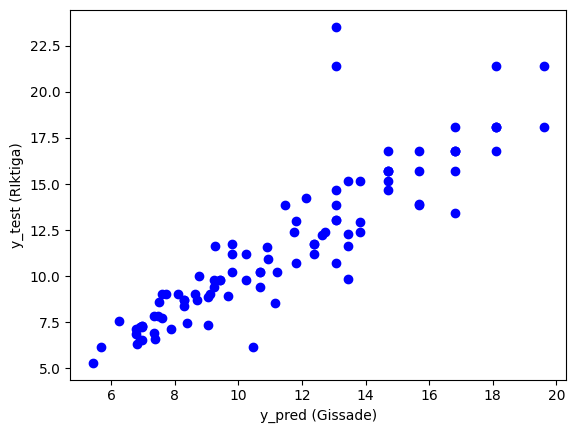

In [12]:
plt.scatter(y_pred,y_test,color="blue")
plt.xlabel("y_pred (Gissade)")
plt.ylabel("y_test (RIktiga)")
plt.show()
#y_pred,y_test mishe tu mehvare ofoghi x biad y_pred vezare tu mehvare amudi y biad y_test bezare